In [ ]:
# Author: Rifat Saeed
# Classification of Brain Tumer MRI using Convolutional Neural Network(CNN)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Conv2D ,Flatten,Dropout,MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [13]:
img_width, img_height = 32, 32

train_data_dir = 'C:\DataScience\ResearchArticle\Training'
validation_data_dir = 'C:\DataScience\ResearchArticle\Testing'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=5,
    width_shift_range=0.2,  # horizontal shift
    zoom_range=0.2,
    brightness_range=[0.2,0.8],  # brightness
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',)
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=5,
    width_shift_range=0.2,  # horizontal shift
    zoom_range=0.2,
    brightness_range=[0.2,0.8],  # brightness
    horizontal_flip=True)
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.025))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.025))
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(strides=(2,2),padding='same'))
model.add(Dropout(0.025))

In [15]:
model.add(Flatten()) 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(4, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 128)        

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
EPOCHS = 600
STEPS_PER_EPOCH = 100
history=model.fit(
 train_generator,
 batch_size=16,
 steps_per_epoch=STEPS_PER_EPOCH,
 epochs=EPOCHS,
 validation_data=validation_generator)

Epoch 1/600
100/100 [==============================] - 30s 299ms/step - loss: 1.3272 - accuracy: 0.3339 - val_loss: 1.3696 - val_accuracy: 0.3661
Epoch 2/600
100/100 [==============================] - 30s 296ms/step - loss: 1.2247 - accuracy: 0.4306 - val_loss: 1.2235 - val_accuracy: 0.4508
Epoch 3/600
100/100 [==============================] - 28s 281ms/step - loss: 1.0910 - accuracy: 0.5251 - val_loss: 1.1427 - val_accuracy: 0.5317
Epoch 4/600
100/100 [==============================] - 28s 281ms/step - loss: 0.9648 - accuracy: 0.5886 - val_loss: 0.9864 - val_accuracy: 0.6079
Epoch 5/600
100/100 [==============================] - 31s 307ms/step - loss: 0.9180 - accuracy: 0.6030 - val_loss: 0.9248 - val_accuracy: 0.6224
Epoch 6/600
100/100 [==============================] - 29s 292ms/step - loss: 0.8412 - accuracy: 0.6407 - val_loss: 0.8725 - val_accuracy: 0.6247
Epoch 7/600
100/100 [==============================] - 28s 278ms/step - loss: 0.8053 - accuracy: 0.6668 - val_loss: 0.9305 -

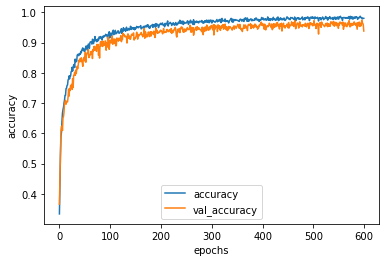

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
leg = plt.legend(loc='lower center')
plt.show()

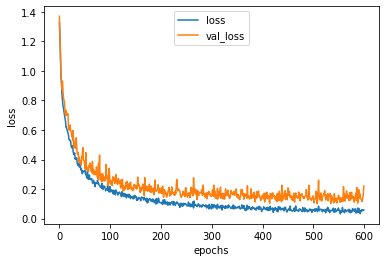

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
leg = plt.legend(loc='upper center')
plt.show()